In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv("data/X_train.csv", encoding='cp949')
y_train = pd.read_csv("data/y_train.csv", encoding='cp949')
X_test = pd.read_csv("data/X_test.csv", encoding='cp949')

In [3]:
print(X_train.shape, y_train.shape, X_test.shape)

(3500, 10) (3500, 2) (2482, 10)


In [4]:
X_train.describe(include='all')

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
count,3500.000000,3.500000e+03,3.500000e+03,1.205000e+03,3500,3500,3500.000000,3500.000000,3500.000000,3500.000000
unique,NaN,NaN,NaN,NaN,42,24,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,기타,본 점,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,595,1077,NaN,NaN,NaN,NaN
mean,1749.500000,9.191925e+07,1.966424e+07,2.407822e+07,NaN,NaN,19.253714,2.834963,0.307246,20.958286
std,1010.507298,1.635065e+08,3.199235e+07,4.746453e+07,NaN,NaN,27.174942,1.912368,0.289752,24.748682
min,0.000000,-5.242152e+07,-2.992000e+06,5.600000e+03,NaN,NaN,1.000000,1.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,2.259000e+06,NaN,NaN,2.000000,1.666667,0.027291,4.000000
50%,1749.500000,2.822270e+07,9.837000e+06,7.392000e+06,NaN,NaN,8.000000,2.333333,0.256410,13.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.412000e+07,NaN,NaN,25.000000,3.375000,0.448980,28.000000


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


In [13]:
X_train.corr()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,1.000000,-0.008004,-0.005883,0.070135,-0.025234,-0.004840,0.001900,0.020070
총구매액,-0.008004,1.000000,0.700080,0.419734,0.659084,0.090022,0.014396,-0.212944
최대구매액,-0.005883,0.700080,1.000000,0.410562,0.374147,0.018980,0.022277,-0.115837
환불금액,0.070135,0.419734,0.410562,1.000000,0.270290,-0.063114,-0.062397,-0.211125
내점일수,-0.025234,0.659084,0.374147,0.270290,1.000000,0.225264,-0.010325,-0.293200
내점당구매건수,-0.004840,0.090022,0.018980,-0.063114,0.225264,1.000000,0.007659,-0.091151
주말방문비율,0.001900,0.014396,0.022277,-0.062397,-0.010325,0.007659,1.000000,0.003372
구매주기,0.020070,-0.212944,-0.115837,-0.211125,-0.293200,-0.091151,0.003372,1.000000


In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
x = X_test['주구매상품'].to_list()
y = X_test['주구매상품'].value_counts().to_list()

In [7]:
x = x[:5]
y = y[:5]

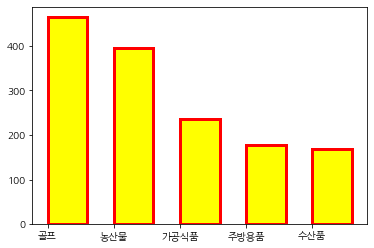

In [8]:
plt.bar(x ,y, width=0.6, align='edge', color="yellow", edgecolor="red", linewidth=3, tick_label=x)
plt.show()

In [9]:
X_train.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [10]:
y_train.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


In [11]:
import matplotlib as mpl

#font 설정 파일 위치 출력
mpl.matplotlib_fname()

'c:\\bda-test\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'